### imports

In [1]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

read the image

In [10]:
img = plt.imread('img2.jpg')

In [11]:
height,width,layers = img.shape
img.shape

(466, 700, 3)

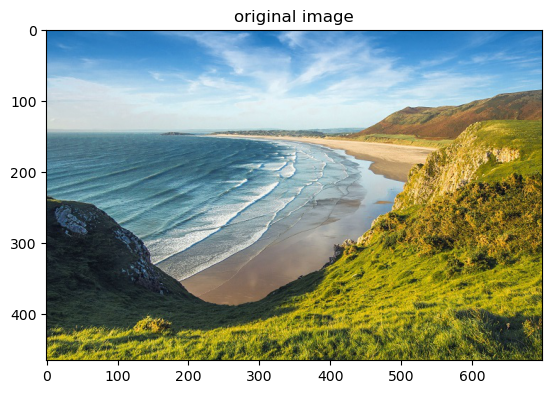

In [12]:
plt.imshow(img)
plt.title('original image')
plt.show()

### k means clustering using pixel color values

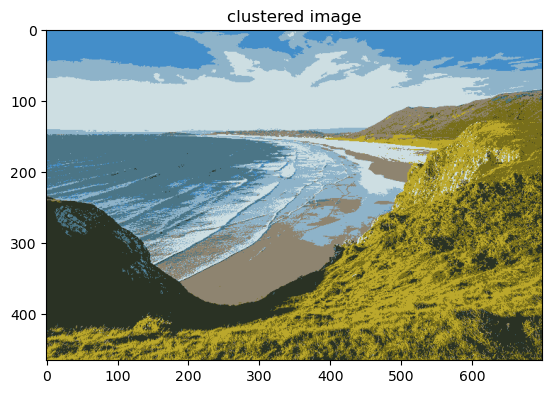

In [18]:
# initialize k means model
model = KMeans(n_clusters=8)

# fit model
model.fit(img.reshape(-1,3))

# use model to get the cluster of each pixel
clustered = model.predict(img.reshape(-1,3))

# re arrange the cluster values to the shape of the image
clustered = np.array(clustered).reshape(height,width)

# create the image out of the cluster centers
new_img = model.cluster_centers_[clustered].astype(int)

# plot the clustered image
plt.imshow(new_img)
plt.title('clustered image')
plt.show()

### k means clustering using pixel color values and pixel location

In [29]:
img.shape

(466, 700, 3)

In [30]:
# create a matrix with the same size as the image which contains the row number of the pixel
rows = np.arange(0,height).reshape(height,1) * np.ones([1,width])

# create a matrix with the same size as the image which contains the column number of the pixel
columns = np.ones([height,1]) * np.arange(0,width).reshape(1,width)

rows.shape, columns.shape

((466, 700), (466, 700))

In [31]:
# change the shape of the arrays from (466,700) to (466,700,1)
rows = rows[...,np.newaxis]
columns = columns[...,np.newaxis]

In [34]:
# set how weight the pixel location should take in the clustering process
pixel_loc_weight = 0.4

# creating the pixel location array by combining row & column numbers and setting the weight
pixel_loc = np.concatenate([rows,columns],axis=2) * pixel_loc_weight

# combine image pixel color values with the pixel locations
img_with_loc = np.concatenate([img,pixel_loc],axis=2)

img_with_loc.shape

(466, 700, 5)

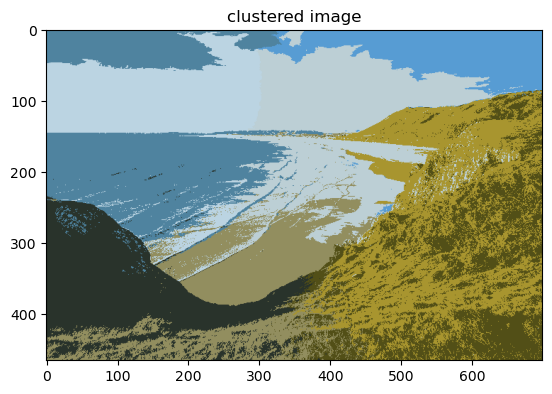

In [35]:
# save the height, width, and layers
height, width, layers = img_with_loc.shape

# initialize the k means model
model = KMeans(n_clusters=8)

# fit model
model.fit(img_with_loc.reshape(-1,layers))

# use model to get the cluster of each pixel
clustered = model.predict(img_with_loc.reshape(-1,layers))

# re arrange the cluster values to the shape of the image
clustered = np.array(clustered).reshape(height,width)

# create the image out of the cluster centers
new_img = model.cluster_centers_[clustered].astype(int)[:,:,:3]

# plot the clustered image
plt.imshow(new_img)
plt.title('clustered image')
plt.show()

In [67]:
# initialize the DBSACN model
model = DBSCAN(eps=2)

# fit model
model.fit(img.reshape(-1,3))

# use model to get the cluster of each pixel
clustered = model.labels_

print(f'number of unique clusters: {np.unique(clustered).shape[0]}')

number of unique clusters: 1827


In [68]:
# calculate the cluster centers
cluster_centers = []

for i in range(np.unique(clustered).shape[0]):
    cluster_centers.append( img.reshape(-1,3)[clustered==i].mean(axis=0).astype(int) )

<ipython-input-68-f2f0f3daa506>:5: RuntimeWarning: Mean of empty slice.
  cluster_centers.append( img.reshape(-1,3)[clustered==i].mean(axis=0).astype(int) )
C:\Users\ahmed.al.2\Anaconda3\envs\AhmedEnv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


the last cluster centers contains very high negative numbers. we will replace them with zero

In [69]:
cluster_centers[-1]

array([-2147483648, -2147483648, -2147483648])

In [70]:
cluster_centers[-1] = np.array([0,0,0])

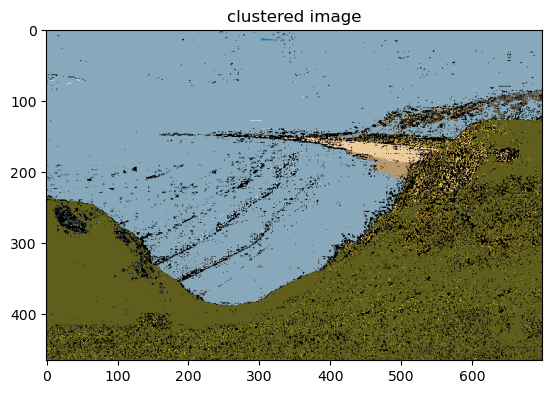

In [71]:
# convert cluster centers into an array
cluster_centers = np.array(cluster_centers)

# re arrange the cluster values to the shape of the image
new_img = cluster_centers[clustered.reshape(height,width)]

# plot the clustered image
plt.imshow(new_img)
plt.title('clustered image')
plt.show()